In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import os
import scipy as sp
from dotenv import load_dotenv
load_dotenv()
ROOT_DIR = os.path.expanduser(os.getenv('PROJECT_WORKING_DIRECTORY'))

df = pd.read_csv('results.csv')
df

,sparse_points,kernel,sentence_transformer,sentence_pairing_method,pearsonr,model_file
0,25,rbf,sentence-transformers/xlm-r-distilroberta-base...,prod,0.864501,b65e431887160cb508cc69fc2ec9b24aa5b3964041bb50...
1,45,rbf,sentence-transformers/xlm-r-distilroberta-base...,prod,0.862584,bd703f432489551cf5cd601940d16c14a482eeae6924f0...
2,10,rbf,sentence-transformers/xlm-r-distilroberta-base...,prod,0.864196,89fc16244ea0ef050635f364ffde13dd1eab089408377e...
3,20,rbf,sentence-transformers/xlm-r-distilroberta-base...,prod,0.863161,deba8e8ad03fa2cdef4d1fc7c4104ad9065e10b3c497dc...
4,40,rbf,sentence-transformers/xlm-r-distilroberta-base...,prod,0.865568,b0e3aac1ec0224035d113341c3becd677a4d24a225ef81...
5,30,rbf,sentence-transformers/xlm-r-distilroberta-base...,prod,0.865493,a96c2a179d3936fcf0be1991d6b5aba658afd8c84bea1c...
6,15,rbf,sentence-transformers/xlm-r-distilroberta-base...,prod,0.864536,076b617d35d74ff1164adaf570468e392363c71db1afe1...
7,35,rbf,sentence-transformers/xlm-r-distilroberta-base...,prod,0.862679,c7154e4ea3cd458a157aa740dee5a3f9a5b8340f88b15a...
8,50,rbf,sentence-transformers/xlm-r-distilroberta-base...,prod,0.862943,e2f97a5419300798a3b24208f8fd87bc251488d3234956...
9,5,rbf,sentence-transformers/xlm-r-distilroberta-base...,prod,0.860470,8caeab104fa3b06948d96deeb87adc9eaab5dc654da529...


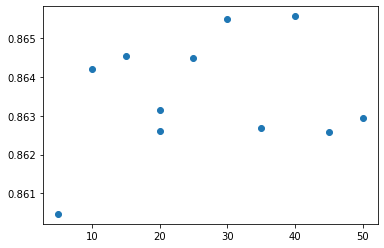

In [2]:
plt.scatter(df['sparse_points'], df['pearsonr'])

Pearson: PearsonRResult(statistic=0.6151842225185249, pvalue=4.242398878248106e-48)


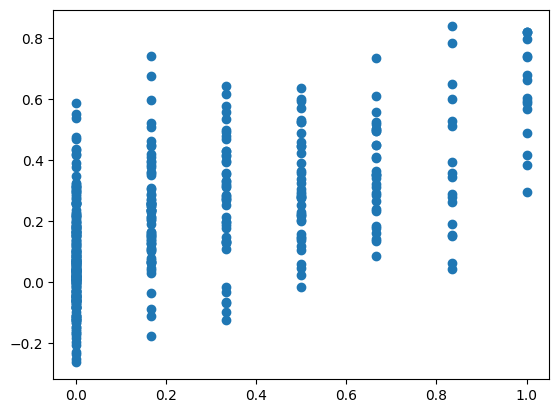

In [21]:
model = torch.load('best_model.save')
interview_scores = pd.read_excel(os.path.join(ROOT_DIR, 'data/full_data.xlsx'), sheet_name = 'full_data')['avg_EA'].values / 2.
designer = np.load(os.path.join(ROOT_DIR, 'results/embeddings/xlm-r-distilroberta-base-paraphrase-v1/designer.npy'))
user = np.load(os.path.join(ROOT_DIR, 'results/embeddings/xlm-r-distilroberta-base-paraphrase-v1/user.npy'))
prod = designer * user
X_test = torch.tensor(prod)
Y_predicted = model(X_test)
plt.scatter(interview_scores, Y_predicted[0].detach())
print("Pearson:", sp.stats.pearsonr(interview_scores, Y_predicted[0].detach()))

Pearson: PearsonRResult(statistic=0.6188145680249568, pvalue=8.374376422243724e-49)


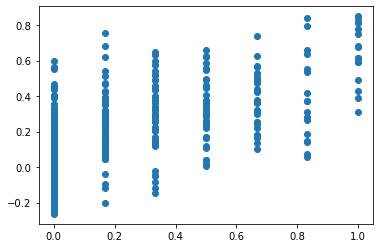

In [7]:
model = torch.load('a5f255db84029cb55d33d34c551d000e9aa3751a5a36794b953fe7e06fc4aec3.save')
interview_scores = pd.read_excel(os.path.join(ROOT_DIR, 'data/full_data.xlsx'), sheet_name = 'full_data')['avg_EA'].values / 2.
designer = np.load(os.path.join(ROOT_DIR, 'results/embeddings/xlm-r-distilroberta-base-paraphrase-v1/designer.npy'))
user = np.load(os.path.join(ROOT_DIR, 'results/embeddings/xlm-r-distilroberta-base-paraphrase-v1/user.npy'))
prod = designer * user
X_test = torch.tensor(prod)
Y_predicted = model(X_test)
plt.scatter(interview_scores, Y_predicted[0].detach())
print("Pearson:", sp.stats.pearsonr(interview_scores, Y_predicted[0].detach()))